In [3]:
import os
os.environ['TFF_CPP_MIN_LOG_LEVEL']='2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test)= mnist.load_data()
print(x_train.shape)
print(y_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)


In [5]:
x_train=x_train.reshape(-1,784).astype("float32")/255.0
x_test=x_test.reshape(-1,784).astype("float32")/255.0

In [10]:
#sequential api (very conveninent, not very flexible)
# One input map to one output map

model = keras.Sequential(
    [
        keras.Input(shape=28*28),
        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(10),
    ]
)
print(model.summary())

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy'],
)

model.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2)

model.evaluate(x_test,y_test,batch_size=32,verbose=2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


SystemExit: 

In [12]:
# another way to define by adding layers
model= keras.Sequential()
model.add(keras.Input(shape=(784)))
model.add(layers.Dense(512,activation='relu'))
# it can be a debugging tool
print(model.summary())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(10))


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
Total params: 401920 (1.53 MB)
Trainable params: 401920 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [16]:
# Functional api (more flexible)
inputs =keras.Input(shape=(784))
x= layers.Dense(512,activation='relu')(inputs)
x=layers.Dense(256,activation='relu')(x)
outputs=layers.Dense(10,activation='softmax')(x)
model= keras.Model(inputs=inputs,outputs=outputs)

print(model.summary())
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy'],
)
model.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2)

model.evaluate(x_test,y_test,batch_size=32,verbose=2)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_27 (Dense)            (None, 512)               401920    
                                                                 
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 dense_29 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
1875/1875 - 12s - loss: 0.1847 - accuracy: 0.9439 - 12s/epoch - 6ms/step
Epoch 2/5
1875/1875 - 11s - loss: 0.0784 - accuracy: 0.9754 - 11s/e

[0.0679042786359787, 0.9818999767303467]

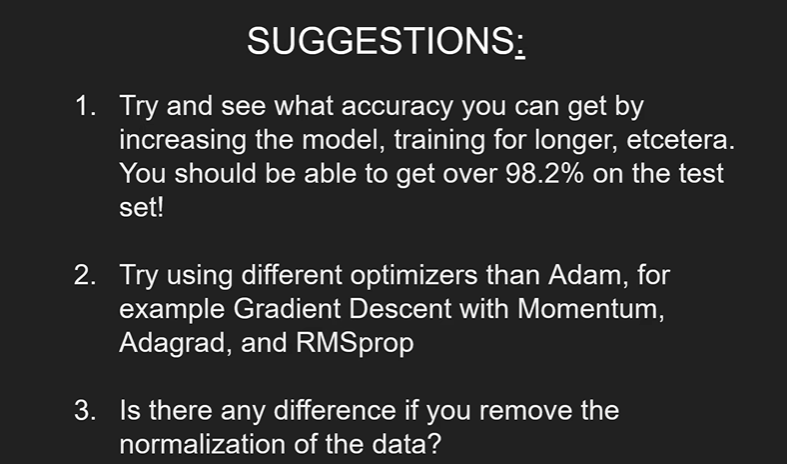